In [134]:
import gym
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

import time
import matplotlib.pyplot as plt

In [135]:
class qAgent:
    def __init__(self, n_action_space, n_observation_space, epsilon, alpha, discount_factor ):
        self.n_action_space = n_action_space
        self.n_observation_space = n_observation_space
        
        self.epsilon = epsilon
        self.alpha = alpha
        self.discount_factor = discount_factor
        
        self.q_table = np.zeros([n_observation_space, n_action_space])
        
    def get_q_value(self, state, action):
        return self.q_table[state][action]
    
    def set_q_value(self, state, action, value):
        self.q_table[state][action] = value
        
    def get_action_epsilon_greedy(self, state):    
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.n_action_space)
        else:
            action = self.get_best_action(state) # greedy policy 
        return action
    
    def get_best_action(self, state):
        best_action = [self.get_q_value(state,action) for action in range(self.n_action_space)]
        best_action = np.argmax(best_action)
        return best_action 
    
    def update_q_table(self, state, new_state, action, reward):
        # Q(S,A) = Q(S,A) + alpha[R + gamma*maxaQ(S',a)-Q(S,A)]
        
        value_new_state = self.get_q_value(new_state, self.get_best_action(new_state))
        
        new_q_value = self.get_q_value(state,action) +\
                self.alpha*(reward+self.discount_factor*value_new_state-self.get_q_value(state,action))
        
        #new_q_value = (1 - self.alpha)*self.get_q_value(state,action)+self.alpha*(reward+self.discount_factor*value_new_state)
        
        self.set_q_value(state, action, new_q_value)
        

In [136]:
# Load Taxi-v3 environment 
# https://gym.openai.com/envs/Taxi-v3/
env = gym.make('Taxi-v3')

In [137]:
"""
For this environment we have 6 actions and 500 discrete states.
https://github.com/openai/gym/blob/master/gym/envs/toy_text/taxi.py

Actions:
There are 6 discrete deterministic actions:
- 0: move south
- 1: move north
- 2: move east 
- 3: move west 
- 4: pickup passenger
- 5: dropoff passenger

Observations: 
    There are 500 discrete states since there are 25 taxi positions, 5 possible locations of the passenger 
    (including the case when the passenger is in the taxi), and 4 destination locations. 
"""

print("Number of possible actions:", env.action_space.n)
print("Number of possible states:", env.observation_space.n)

Number of possible actions: 6
Number of possible states: 500


In [138]:
# Hyperparameters
epsilon = 1
alpha = 0.5
discount_factor = 0.99

agent = qAgent(n_action_space=env.action_space.n,
               n_observation_space=env.observation_space.n,
               epsilon=epsilon,
               alpha=alpha,
               discount_factor=discount_factor)

In [139]:
def train(env, agent, n_episodes=20):
    rewards = []
    
    for ep in range(n_episodes):
        n_iter = 0
        state = env.reset()
        done = False
        ep_rewards = 0.0
        
        while not done:
            n_iter += 1
            action = agent.get_action_epsilon_greedy(state)
            
            new_state, reward, done, info = env.step(action)
            
            agent.update_q_table(state, new_state, action, reward)
            
            state = new_state
            ep_rewards += reward
            
        print("Ep={}, done after {} iteractions, epsilon={}".format(ep+1, n_iter, agent.epsilon))    
        agent.epsilon *= 0.95
        rewards.append(ep_rewards)
    env.close()
    return rewards

In [140]:
rewards = train(env, agent, n_episodes=1000)

Ep=1, done after 200 iteractions, epsilon=1
Ep=2, done after 200 iteractions, epsilon=0.95
Ep=3, done after 200 iteractions, epsilon=0.9025
Ep=4, done after 200 iteractions, epsilon=0.8573749999999999
Ep=5, done after 200 iteractions, epsilon=0.8145062499999999
Ep=6, done after 200 iteractions, epsilon=0.7737809374999999
Ep=7, done after 200 iteractions, epsilon=0.7350918906249998
Ep=8, done after 200 iteractions, epsilon=0.6983372960937497
Ep=9, done after 200 iteractions, epsilon=0.6634204312890623
Ep=10, done after 200 iteractions, epsilon=0.6302494097246091
Ep=11, done after 200 iteractions, epsilon=0.5987369392383786
Ep=12, done after 200 iteractions, epsilon=0.5688000922764596
Ep=13, done after 200 iteractions, epsilon=0.5403600876626365
Ep=14, done after 200 iteractions, epsilon=0.5133420832795047
Ep=15, done after 197 iteractions, epsilon=0.48767497911552943
Ep=16, done after 200 iteractions, epsilon=0.46329123015975293
Ep=17, done after 200 iteractions, epsilon=0.4401266686517

Ep=218, done after 69 iteractions, epsilon=1.4656232562286176e-05
Ep=219, done after 15 iteractions, epsilon=1.3923420934171866e-05
Ep=220, done after 43 iteractions, epsilon=1.3227249887463272e-05
Ep=221, done after 53 iteractions, epsilon=1.2565887393090107e-05
Ep=222, done after 54 iteractions, epsilon=1.19375930234356e-05
Ep=223, done after 13 iteractions, epsilon=1.134071337226382e-05
Ep=224, done after 56 iteractions, epsilon=1.0773677703650629e-05
Ep=225, done after 10 iteractions, epsilon=1.0234993818468096e-05
Ep=226, done after 17 iteractions, epsilon=9.72324412754469e-06
Ep=227, done after 33 iteractions, epsilon=9.237081921167456e-06
Ep=228, done after 13 iteractions, epsilon=8.775227825109082e-06
Ep=229, done after 14 iteractions, epsilon=8.336466433853627e-06
Ep=230, done after 27 iteractions, epsilon=7.919643112160946e-06
Ep=231, done after 14 iteractions, epsilon=7.523660956552898e-06
Ep=232, done after 13 iteractions, epsilon=7.147477908725253e-06
Ep=233, done after 9 

Ep=520, done after 22 iteractions, epsilon=2.745055597321714e-12
Ep=521, done after 17 iteractions, epsilon=2.607802817455628e-12
Ep=522, done after 13 iteractions, epsilon=2.4774126765828464e-12
Ep=523, done after 21 iteractions, epsilon=2.353542042753704e-12
Ep=524, done after 16 iteractions, epsilon=2.2358649406160186e-12
Ep=525, done after 10 iteractions, epsilon=2.1240716935852176e-12
Ep=526, done after 7 iteractions, epsilon=2.0178681089059567e-12
Ep=527, done after 11 iteractions, epsilon=1.9169747034606587e-12
Ep=528, done after 11 iteractions, epsilon=1.8211259682876257e-12
Ep=529, done after 10 iteractions, epsilon=1.7300696698732444e-12
Ep=530, done after 13 iteractions, epsilon=1.643566186379582e-12
Ep=531, done after 11 iteractions, epsilon=1.5613878770606029e-12
Ep=532, done after 11 iteractions, epsilon=1.4833184832075727e-12
Ep=533, done after 17 iteractions, epsilon=1.409152559047194e-12
Ep=534, done after 13 iteractions, epsilon=1.3386949310948342e-12
Ep=535, done aft

Ep=899, done after 16 iteractions, epsilon=9.903701665432788e-21
Ep=900, done after 13 iteractions, epsilon=9.408516582161148e-21
Ep=901, done after 16 iteractions, epsilon=8.93809075305309e-21
Ep=902, done after 13 iteractions, epsilon=8.491186215400436e-21
Ep=903, done after 14 iteractions, epsilon=8.066626904630413e-21
Ep=904, done after 14 iteractions, epsilon=7.663295559398893e-21
Ep=905, done after 12 iteractions, epsilon=7.280130781428948e-21
Ep=906, done after 12 iteractions, epsilon=6.9161242423575e-21
Ep=907, done after 17 iteractions, epsilon=6.570318030239625e-21
Ep=908, done after 14 iteractions, epsilon=6.2418021287276435e-21
Ep=909, done after 11 iteractions, epsilon=5.929712022291261e-21
Ep=910, done after 11 iteractions, epsilon=5.6332264211766975e-21
Ep=911, done after 17 iteractions, epsilon=5.3515651001178625e-21
Ep=912, done after 13 iteractions, epsilon=5.083986845111969e-21
Ep=913, done after 12 iteractions, epsilon=4.8297875028563705e-21
Ep=914, done after 12 it

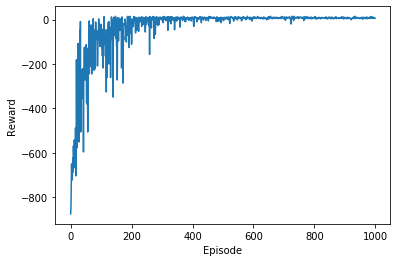

In [141]:
# Plot rewards x episode

plt.plot(rewards)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.show()       

In [142]:
def visualise_agent(policy, n_episodes=5):
    for ep in range(n_episodes):
        done = False
        n_iter = 0
        observation = env.reset()
        ep_reward = 0.0
        while not done:
            env.render()
            action = policy(observation)
            observation, reward, done, _ = env.step(action)
            time.sleep(0.5)
            ep_reward += reward
            n_iter += 1
        print("Episode {} finished after {} timesteps, total reward={}".format(ep+1, n_iter, ep_reward))
        print()
    env.close()

In [143]:
visualise_agent(agent.get_best_action, n_episodes=2)

TypeError: visualise_agent() got an unexpected keyword argument 'n'